<a href="https://colab.research.google.com/github/TamaraMaggioni/DiploDatos2021/blob/main/Supervisado/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Importamos datos train
url = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/travel_insurance_prediction_train.csv'
data_train = pd.read_csv(url)
data_train.head()


,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [ ]:
data_train['TravelInsurance'].unique() # Nuestro target ya esta codeado en valores de 0 y 1.

array([1, 0])

In [ ]:
data_train['TravelInsurance'].value_counts() # Solo le dieron el seguro a 1/3 de los usuarios.

0    958
1    532
Name: TravelInsurance, dtype: int64

Tenemos 9 columnas y la columna target (si le dieron o no el seguro de viaje). De esas 9 columnas, eliminamos Customer ya que es un numero asignado a cada viajero. No solo no nos aporta ninguna info, sino que nos puede entorpecer las predicciones de nuestro algoritmo. 
Vamos a ir viendo las otras 8 columnas una a una, a ver como las podemos ir manipulando. 



In [ ]:
# Importamos datos test
url = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/travel_insurance_prediction_test.csv'
test = pd.read_csv(url)
test.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


In [ ]:
test.info() # En data test tenemos TODAS las features MENOS la variable target. Hay que hacer el mismo tratamiento de feature a ambos data sets.3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [ ]:
# Vamos a eliminar la columna Customer de ambos data sets, porque no da absolutamente nada de info para el modelo
data_train.drop(columns=['Customer'], inplace=True) # Le ponemos el inplace True para que lo conserve en el df original.
data_test = test.drop(['Customer'], axis=1)

In [ ]:
data_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,31,Government Sector,No,300000,7,0,No,No,0
4,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [ ]:
data_test[:2]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No


In [ ]:
# Vamos por las features mas sencillas. 
# Debemos pasar todo a valores numericos. Las columas GraduateOrNot, FrequentFlyer y EverTravelledAbroad hay que convertirlas a 0 y 1.
# Primero fijemonos si estas columnas tienen unicamente Yes y No como respuesta o si hay alguna otra respuesta.
print(data_train['GraduateOrNot'].value_counts())
print(data_test['GraduateOrNot'].value_counts())

Yes    1268
No      222
Name: GraduateOrNot, dtype: int64
Yes    424
No      73
Name: GraduateOrNot, dtype: int64


In [ ]:
data_train[['GraduateOrNot', 'TravelInsurance']].groupby(['GraduateOrNot'], as_index=False).mean().sort_values(by='TravelInsurance', ascending=False)

,GraduateOrNot,TravelInsurance
0,No,0.364865
1,Yes,0.355678


In [ ]:
#data_train['GraduateOrNot'] = data_train.FrequentFlyer.replace('Yes', 1).replace('No', 0)
#data_test['GraduateOrNot'] = data_test.FrequentFlyer.replace('Yes', 1).replace('No', 0)

In [ ]:
data_train = data_train.drop(['GraduateOrNot'], axis = 1)
data_test = data_test.drop(['GraduateOrNot'], axis = 1)

In [ ]:
print(data_train['FrequentFlyer'].value_counts())
print(data_test['FrequentFlyer'].value_counts())

No     1173
Yes     317
Name: FrequentFlyer, dtype: int64
No     397
Yes    100
Name: FrequentFlyer, dtype: int64


In [ ]:
#Influye este feature en mi target?
data_train[['FrequentFlyer', 'TravelInsurance']].groupby(['FrequentFlyer'], as_index=False).mean().sort_values(by='TravelInsurance', ascending=False)

,FrequentFlyer,TravelInsurance
1,Yes,0.574132
0,No,0.298380


In [ ]:
# Si influye, bastante!! Vamos a convertirla a valores de 0 y 1.
data_train['FrequentFlyer'] = data_train.FrequentFlyer.replace('Yes', 1).replace('No', 0)
data_test['FrequentFlyer'] = data_test.FrequentFlyer.replace('Yes', 1).replace('No', 0)

In [ ]:
print(data_train['EverTravelledAbroad'].value_counts())
print(data_test['EverTravelledAbroad'].value_counts())

No     1202
Yes     288
Name: EverTravelledAbroad, dtype: int64
No     405
Yes     92
Name: EverTravelledAbroad, dtype: int64


In [ ]:
# Influye en mi target haber viajado al exterior?
data_train[['EverTravelledAbroad', 'TravelInsurance']].groupby(['EverTravelledAbroad'], as_index=False).mean().sort_values(by='TravelInsurance', ascending=False)

,EverTravelledAbroad,TravelInsurance
1,Yes,0.784722
0,No,0.254576


In [ ]:
#Tambien, y mas que la de pasajero frecuente. Convirtamos estos valores a 0 y 1.
data_train['EverTravelledAbroad'] = data_train.EverTravelledAbroad.replace('Yes', 1).replace('No', 0)
data_test['EverTravelledAbroad'] = data_test.EverTravelledAbroad.replace('Yes', 1).replace('No', 0)

In [ ]:
#Ahora pasamos estos valores 0,1 a numericos:
data_train['FrequentFlyer'] = data_train['FrequentFlyer'].astype(int)
data_test['FrequentFlyer'] = data_test['FrequentFlyer'].astype(int)
#data_train['GraduateOrNot'] = data_train['GraduateOrNot'].astype(int)
#data_test['GraduateOrNot'] = data_test['GraduateOrNot'].astype(int)
data_train['EverTravelledAbroad'] = data_train['EverTravelledAbroad'].astype(int)
data_test['EverTravelledAbroad'] = data_test['EverTravelledAbroad'].astype(int)

In [ ]:
# Esto tambien se puede codear asi:
# data_train['Feature'] = data_train['Feature'].map( {'condicion_a': 1, 'condicion_b': 0} ).astype(int)

In [ ]:
#Veamos si funciono, solo con una columna:
print(data_train.FrequentFlyer.value_counts())
print(data_test.FrequentFlyer.value_counts())

0    1173
1     317
Name: FrequentFlyer, dtype: int64
0    397
1    100
Name: FrequentFlyer, dtype: int64


In [ ]:
data_train.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,33,Private Sector/Self Employed,550000,6,0,0,0,1
1,28,Private Sector/Self Employed,800000,7,0,1,0,0
2,31,Private Sector/Self Employed,1250000,4,0,0,0,0
3,31,Government Sector,300000,7,0,0,0,0
4,28,Private Sector/Self Employed,1250000,3,0,0,0,0


In [ ]:
data_test.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,29,Private Sector/Self Employed,1100000,4,0,0,0
1,28,Private Sector/Self Employed,750000,5,1,1,0
2,31,Government Sector,1500000,4,0,1,1
3,28,Private Sector/Self Employed,1400000,3,0,0,1
4,33,Private Sector/Self Employed,1500000,4,0,1,1


In [ ]:
# Ahora veamos las features que van a llevar mas trabajo.
print(data_train['Employment Type'].value_counts())
print(data_test['Employment Type'].value_counts())

Private Sector/Self Employed    1057
Government Sector                433
Name: Employment Type, dtype: int64
Private Sector/Self Employed    360
Government Sector               137
Name: Employment Type, dtype: int64


In [ ]:
data_train[['Employment Type', 'TravelInsurance']].groupby(['Employment Type'], as_index=False).mean().sort_values(by='TravelInsurance', ascending=False)

,Employment Type,TravelInsurance
1,Private Sector/Self Employed,0.408704
0,Government Sector,0.230947


In [ ]:
# Bien, el sector privado saca mas seguros que el sector publico. 
# En esta variable podemos utilizar un OneHotEncoder, para convertir cada respuesta en un 0 o 1 (presente/ausente)
# Para el dataset de entrenamiento
from sklearn.preprocessing import OneHotEncoder 
onehot_encoder = OneHotEncoder() 
tipo_trabajo=onehot_encoder.fit_transform(data_train[['Employment Type']]).toarray()
tipo_trabajo=pd.DataFrame(tipo_trabajo, columns=onehot_encoder.categories_[0])
tipo_trabajo.head()

,Government Sector,Private Sector/Self Employed
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
# Ahora necesito dropear la columna original y pegarle esta nueva:
data_train = data_train.drop(['Employment Type'], axis=1)

In [ ]:
data_train = data_train.join(tipo_trabajo)

In [ ]:
data_train[:2]

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector,Private Sector/Self Employed
0,33,550000,6,0,0,0,1,0.0,1.0
1,28,800000,7,0,1,0,0,0.0,1.0


In [ ]:
# Para el dataset de test
tipo_trabajo=onehot_encoder.fit_transform(data_test[['Employment Type']]).toarray()
tipo_trabajo=pd.DataFrame(tipo_trabajo, columns=onehot_encoder.categories_[0])
tipo_trabajo.head()

,Government Sector,Private Sector/Self Employed
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [ ]:
data_test = data_test.drop(['Employment Type'], axis=1)

In [ ]:
data_test = data_test.join(tipo_trabajo)

In [ ]:
data_test.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Government Sector,Private Sector/Self Employed
0,29,1100000,4,0,0,0,0.0,1.0
1,28,750000,5,1,1,0,0.0,1.0
2,31,1500000,4,0,1,1,1.0,0.0
3,28,1400000,3,0,0,1,0.0,1.0
4,33,1500000,4,0,1,1,0.0,1.0


In [ ]:
#Joya! Ahora las mas dificiles de encodear: Age, AnnualIncome y FamilyMembers.
# Podemos hacer un MinMaxScaler, o podemos hacer bins y dividir cada columna en "categorias" para luego aplicar un OneHot...
# O... algunas de estas features pueden tener un 'orden'. Por ejemplo, a mayor ingreso anual, mas probabilidad de contratar el seguro.
print(data_train['AnnualIncome'].sort_values()) # Los ingresos van entre 300.000 y 1.800.000
print(data_train['Age'].sort_values()) # Entre 25 y 35 anios.
print(data_train['FamilyMembers'].sort_values()) # Entre 2 y 9 miembros.

1008     300000
360      300000
652      300000
1135     300000
1138     300000
         ...   
1066    1750000
1258    1800000
1132    1800000
611     1800000
902     1800000
Name: AnnualIncome, Length: 1490, dtype: int64
479     25
273     25
116     25
281     25
1258    25
        ..
1016    35
1336    35
1399    35
52      35
311     35
Name: Age, Length: 1490, dtype: int64
1116    2
1231    2
814     2
1334    2
1229    2
       ..
228     9
170     9
83      9
1348    9
818     9
Name: FamilyMembers, Length: 1490, dtype: int64


Text(0, 0.5, 'Edad')

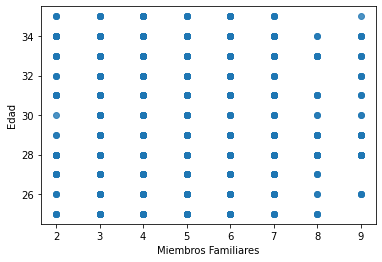

In [ ]:
# Habra alguna correlacion entre estas variables? Veamos su distribucion para evaluar que indice utilizar
# Con un scatter plot veo si hay una tendencia. Debería ver una línea diagonal....
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x = data_train.FamilyMembers, y=data_train.Age, alpha= 0.8)
ax.set_xlabel('Miembros Familiares')
ax.set_ylabel('Edad')

Text(0, 0.5, 'Edad')

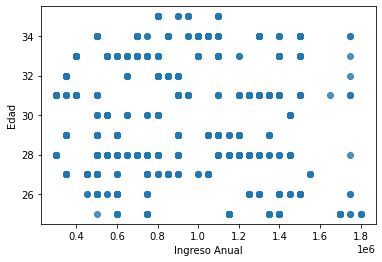

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x = data_train.AnnualIncome, y=data_train.Age, alpha= 0.8)
ax.set_xlabel('Ingreso Anual')
ax.set_ylabel('Edad')

Text(0, 0.5, 'Ingreso Anual')

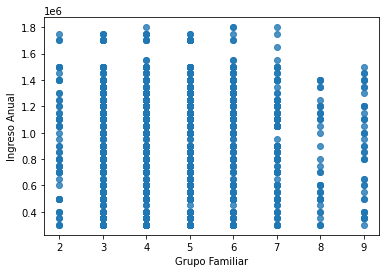

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x = data_train.FamilyMembers, y=data_train.AnnualIncome, alpha= 0.8)
ax.set_xlabel('Grupo Familiar')
ax.set_ylabel('Ingreso Anual')

In [ ]:
# No hay ninguna asociacion entre estas variables. Por lo tanto no existe correlacion entre ninguna de ellas.

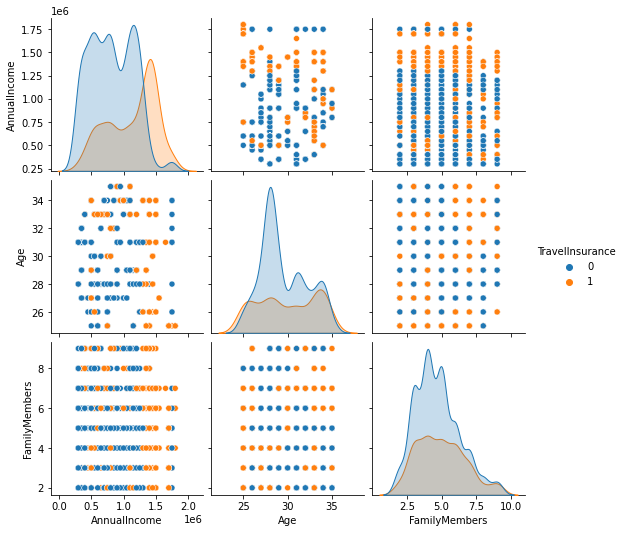

In [ ]:
# Veamos como dan estas variables con el target:
import seaborn as sns
sns.pairplot(data_train[['AnnualIncome', 'Age', 'FamilyMembers', 'TravelInsurance']],
             hue = 'TravelInsurance')
# Por lo que se puede ver, la feature que mas aporta es AnnualIncome. El histograma de frecuencia esta corrido a la derecha. Es decir,
# Las personas con mayores ingresos anuales parecen contratar mas seguros que las de menores ingresos. El limite estaria cerca de los...
# 1.25 1e6 (o el millon 250 mil pesos de ingreso anual).
# En cuanto a las otras variables, podemos ver hay un pico de personas jovenes (25 a 30) que no suelen contrar seguro.
# El nro de miembros de familia no parece influir demasiado.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


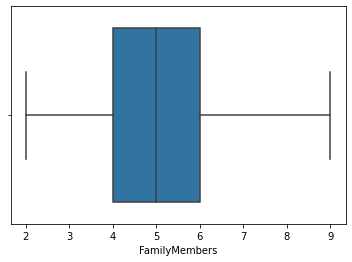

In [ ]:
# Analicemos una por una....
# OUTLIERS
sns.boxplot(data_train['FamilyMembers']) # No hay outliers

In [ ]:
data_train['FamilyMembers'].unique() # No hay ningun viajero solo

array([6, 7, 4, 3, 5, 2, 8, 9])

In [ ]:
# Evaluemos esta feature con una tabla de contingencia....
pd.crosstab(data_train.FamilyMembers, data_train.TravelInsurance, margins=True, normalize=True)
# Se ve lo mismo que en el pariplot.... las familias menos numerosas tienden a comprar MENOS seguro.
# Cuando las familias son mas numerosas (a partir de 6 miembros), la proporcion entre los que adquieren seguro y los que no se equipara.
# Tendria un poco mas de sentido ofrecerle seguro a los de familia de mas de 6 miembros.

TravelInsurance,0,1,All
FamilyMembers,,,
2,0.030872,0.015436,0.046309
3,0.126174,0.069128,0.195302
4,0.169128,0.073154,0.242282
5,0.148322,0.067785,0.216107
6,0.081208,0.063758,0.144966
7,0.051678,0.040940,0.092617
8,0.020134,0.010738,0.030872
9,0.015436,0.016107,0.031544
All,0.642953,0.357047,1.000000


In [ ]:
#data_train.loc[data_train['FamilyMembers'] <= 5, 'FamilyMembers'] = 1
#data_train.loc[data_train['FamilyMembers'] > 5, 'FamilyMembers'] = 2
#data_train[:2]

In [ ]:
# Hacemos lo mismo con los datos de test:
#data_test.loc[data_test['FamilyMembers'] <= 6, 'FamilyMembers'] = 0
#data_test.loc[data_test['FamilyMembers'] > 6, 'FamilyMembers'] = 1

In [ ]:
familia = onehot_encoder.fit_transform(data_train[['FamilyMembers']]).toarray()
familia = pd.DataFrame(familia, columns = onehot_encoder.categories_[0])
familia.head()

,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train = data_train.drop(['FamilyMembers'], axis=1)
data_train = data_train.join(familia)
data_train[:2]

,Age,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector,Private Sector/Self Employed,2,3,4,5,6,7,8,9
0,33,550000,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,28,800000,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
familia = onehot_encoder.fit_transform(data_test[['FamilyMembers']]).toarray()
familia = pd.DataFrame(familia, columns = onehot_encoder.categories_[0])
data_test = data_test.drop(['FamilyMembers'], axis = 1)
data_test = data_test.join(familia)
data_test[:2]

,Age,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Government Sector,Private Sector/Self Employed,2,3,4,5,6,7,8,9
0,29,1100000,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,28,750000,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


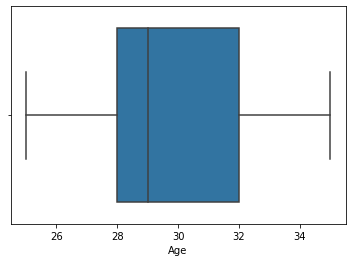

In [ ]:
# Veamos ahora edad
sns.boxplot(data_train['Age']) # Tampoco se ven outliers

In [ ]:
# Veamos como se relaciona edad con nuestra feature con otra tabla de contingencia:
pd.crosstab(data_train.Age, data_train.TravelInsurance, margins=True, normalize=True)

TravelInsurance,0,1,All
Age,,,
25,0.024832,0.044295,0.069128
26,0.038926,0.033557,0.072483
27,0.055034,0.015436,0.070470
28,0.196644,0.052349,0.248993
29,0.073154,0.026174,0.099329
30,0.018792,0.016107,0.034899
31,0.077852,0.040940,0.118792
32,0.040268,0.008725,0.048993
33,0.038255,0.041611,0.079866


In [ ]:
# Creamos bandas de edad para ver mas facilmente la relacion con nuestro target
#data_train['AgeBand'] = pd.cut(data_train['Age'], 6)
#data_train[['AgeBand', 'TravelInsurance']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

In [ ]:
#g = sns.FacetGrid(data_train, col='TravelInsurance') # Visualizamos un poco mejor
#g.map(plt.hist, 'Age', bins=10)

In [ ]:
# No hay una relacion muy clara... parece haber una tendencia en la que las personas con menos edad (entre 26 y 29), compren menos seguro...
# Hagamos bins cada dos anios
#data_train.loc[data_train['Age'] <= 29, 'Age'] = 1
#data_train.loc[data_train['Age'] > 29, 'Age'] = 2

#data_train[:2]


In [ ]:
# Dropeamos AgeBand:
#data_train = data_train.drop(['AgeBand'], axis=1)

In [ ]:
age = onehot_encoder.fit_transform(data_train[['Age']]).toarray()
age = pd.DataFrame(age, columns = onehot_encoder.categories_[0])
age.head()

,25,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train = data_train.drop(['Age'], axis = 1)
data_train = data_train.join(age)
data_train.head()


,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector,Private Sector/Self Employed,2,3,4,5,6,7,8,9,25,26,27,28,29,30,31,32,33,34,35
0,550000,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,800000,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1250000,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,300000,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1250000,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
age = onehot_encoder.fit_transform(data_test[['Age']]).toarray()
age = pd.DataFrame(age, columns = onehot_encoder.categories_[0])
data_test = data_test.drop(['Age'], axis = 1)
data_test = data_test.join(age)
data_test[:2]

,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Government Sector,Private Sector/Self Employed,2,3,4,5,6,7,8,9,25,26,27,28,29,30,31,32,33,34,35
0,1100000,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,750000,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


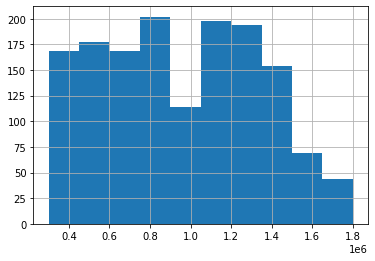

In [ ]:
# Vamos con Annual Income:
data_train['AnnualIncome'].hist() # Si bien hay menos gente que cobra los sueldos mas altos... la distribucion hasta 1.5 es mas o menos pareja
# Pero ojo, no hay distribucion normal!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


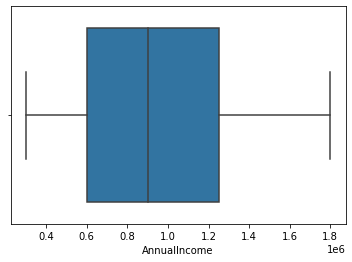

In [ ]:
# Finalmente, pasemos a la feature que aparentemente mas influye en el target:
sns.boxplot(data_train['AnnualIncome']) # Tampoco vemos outliers

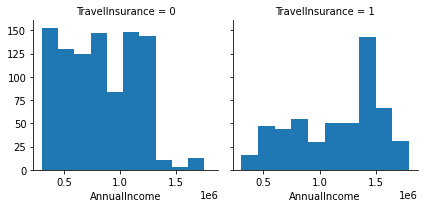

In [ ]:
g = sns.FacetGrid(data_train, col='TravelInsurance') # Visualizamos relacion con target
g.map(plt.hist, 'AnnualIncome', bins=10)
# Si bien hay menos gente que tiene ingresos mas altos, estos son los que suelen adquirir mas el seguro:

In [ ]:
pd.crosstab(data_train.AnnualIncome, data_train.TravelInsurance, margins=True, normalize=True) # El quiebre parece darse en 1.35
# Sin embargo, hay altibajos en toda la franja de sueldos.... 

TravelInsurance,0,1,All
AnnualIncome,,,
300000,0.042953,0.002685,0.045638
350000,0.030201,0.002013,0.032215
400000,0.029530,0.006040,0.035570
450000,0.005369,0.002013,0.007383
500000,0.055705,0.015436,0.071141
550000,0.026174,0.014094,0.040268
600000,0.040268,0.010738,0.051007
650000,0.009396,0.005369,0.014765
700000,0.034228,0.013423,0.047651


In [ ]:
ingreso_anual = onehot_encoder.fit_transform(data_train[['AnnualIncome']]).toarray()
ingreso_anual = pd.DataFrame(ingreso_anual, columns = onehot_encoder.categories_[0])
ingreso_anual.head()

,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1650000,1700000,1750000,1800000
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train = data_train.drop(['AnnualIncome'], axis=1)
data_train = data_train.join(ingreso_anual)

In [ ]:
ingreso_anual = onehot_encoder.transform(data_test[['AnnualIncome']]).toarray()
ingreso_anual = pd.DataFrame(ingreso_anual, columns = onehot_encoder.categories_[0])
data_test = data_test.drop(['AnnualIncome'], axis = 1)
data_test = data_test.join(ingreso_anual)

In [ ]:
data_train[:2]

,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector,Private Sector/Self Employed,2,3,4,5,6,7,8,9,25,26,27,28,29,30,31,32,33,34,35,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1650000,1700000,1750000,1800000
0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_test[:2]

,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Government Sector,Private Sector/Self Employed,2,3,4,5,6,7,8,9,25,26,27,28,29,30,31,32,33,34,35,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1650000,1700000,1750000,1800000
0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train2 = data_train.drop(['ChronicDiseases'], axis = 1)
data_test2 = data_test.drop(['ChronicDiseases'], axis = 1)

## **A probar modelos!**

In [ ]:
X = data_train.drop(['TravelInsurance'], axis=1)
y = data_train['TravelInsurance']

In [ ]:
X2 = data_train2.drop(['TravelInsurance'], axis = 1)
y2 = data_train2['TravelInsurance']

In [ ]:
print(X.shape)
print(y.shape)

(1490, 54)
(1490,)


In [ ]:
print(X2.shape)
print(y2.shape)

(1490, 53)
(1490,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size = 0.15, random_state=0)

In [ ]:
print('Dimensiones del set de entrenamiento', X_train.shape)
print('Dimensiones del set de validacion', X_val.shape)

Dimensiones del set de entrenamiento (1266, 54)
Dimensiones del set de validacion (224, 54)


In [ ]:
print('Dimensiones del set de entrenamiento', X2_train.shape)
print('Dimensiones del set de validacion', X2_val.shape)

Dimensiones del set de entrenamiento (1266, 53)
Dimensiones del set de validacion (224, 53)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.2

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_val)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.29

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X2_train, y2_train)
y_pred = decision_tree.predict(X2_val)
acc_decision_tree = round(decision_tree.score(X2_train, y2_train) * 100, 2)
acc_decision_tree

90.92

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

86.81

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
random_forest = RandomForestClassifier(n_estimators=550)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

93.29

In [ ]:
random_forest = RandomForestClassifier(n_estimators=550)
random_forest.fit(X2_train, y2_train)
y_pred = random_forest.predict(X2_val)
random_forest.score(X2_train, y2_train)
acc_random_forest = round(random_forest.score(X2_train, y2_train) * 100, 2)
acc_random_forest

90.92

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_val)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.38

In [ ]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_val)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

81.2

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X2_train, y2_train)
y_pred = linear_svc.predict(X2_val)
acc_linear_svc = round(linear_svc.score(X2_train, y2_train) * 100, 2)
acc_linear_svc

81.28

##Regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = logreg.predict(X_train) # Predigo con datos de entrenamiento
y_val_pred = logreg.predict(X_val) # Predigo con datos de val

In [ ]:
from sklearn.metrics import f1_score

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_val = f1_score(y_val, y_val_pred)

In [ ]:
print(f1_score_train)
print(f1_score_val)

0.6730769230769231
0.6466165413533834


In [ ]:
param_grid_lr = {
    'penalty': ['l1','l2','elasticnet'],
    'C': [1, 10, 100, 1000000],
    'solver': ['saga','newton-cg','lbfgs'],
    'tol': [1e-3, 1e-4, 1e-2],
    #'max_iter': [100, 1000, 500]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model_lr = LogisticRegression(random_state=0)
cv_lr = GridSearchCV(model_lr, param_grid_lr, scoring='f1', n_jobs=-1)
cv_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'newton-cg', 'lbfgs'],
                         'tol': [0.001, 0.0001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
results_lr = cv_lr.cv_results_

df_lr = pd.DataFrame(results_lr)


In [ ]:
cv_lr.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}

In [ ]:
lr_chosen = LogisticRegression(random_state=0, penalty='l2', C=1)

In [ ]:
lr_chosen.fit(X_train, y_train)

y_train_pred_lr = lr_chosen.predict(X_train)
y_val_pred_lr = lr_chosen.predict(X_val)

In [ ]:
f1_score_train = f1_score(y_train, y_train_pred_lr)
f1_score_val = f1_score(y_val, y_val_pred_lr)

In [ ]:
print(f1_score_train)
print(f1_score_val)

0.6730769230769231
0.6466165413533834


##Arbol de desicion

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_train_pred= clf.predict(X_train)

In [ ]:
y_val_pred= clf.predict(X_val)

In [ ]:
from sklearn.metrics import f1_score

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_val = f1_score(y_val, y_val_pred)

In [ ]:
print(f1_score_train)
print(f1_score_val)

0.8972188633615478
0.6753246753246754


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid_dt = {
    'criterion': ['gini','entropy'],
    'max_depth': [5,10,15,20,30,40,50,80],
    'min_samples_leaf': [1,2,5,10]
}

dtree = DecisionTreeClassifier(random_state=0)

cv_dt = GridSearchCV(dtree, param_grid_dt, scoring='f1')
cv_dt.fit(X_train, y_train);

In [ ]:
cv_dt2 = GridSearchCV(dtree, param_grid_dt, scoring='f1')
cv_dt2.fit(X2_train, y2_train);

In [ ]:
results_dt = cv_dt.cv_results_

df_dt = pd.DataFrame(results_dt)
#df.sort_values(by='rank_test_score').head()
df_dt[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
50,entropy,30,5,0.668888,0.032903,1
58,entropy,50,5,0.668888,0.032903,1
62,entropy,80,5,0.668888,0.032903,1
54,entropy,40,5,0.668888,0.032903,1
46,entropy,20,5,0.668648,0.028088,5


In [ ]:
results_dt2 = cv_dt2.cv_results_

df_dt2 = pd.DataFrame(results_dt2)
#df.sort_values(by='rank_test_score').head()
df_dt2[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
58,entropy,50,5,0.674312,0.025225,1
50,entropy,30,5,0.674312,0.025225,1
54,entropy,40,5,0.674312,0.025225,1
62,entropy,80,5,0.674312,0.025225,1
14,gini,20,5,0.670893,0.020018,5


In [ ]:
cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 5}

In [ ]:
cv_dt2.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 5}

In [ ]:
dtree_chosen = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=10, min_samples_leaf=1) # Nuevo modelo con los parametros seleccionados.

dtree_chosen.fit(X_train, y_train) # Entrenamos

y_train_pred_dt = dtree_chosen.predict(X_train) # Predecimos en train
y_val_pred_dt = dtree_chosen.predict(X_val) # Predecimos en test

In [ ]:
dtree_chosen2 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=10, min_samples_leaf=1) # Nuevo modelo con los parametros seleccionados.

dtree_chosen2.fit(X2_train, y2_train) # Entrenamos

y_train_pred_dt2 = dtree_chosen2.predict(X2_train) # Predecimos en train
y_val_pred_dt2 = dtree_chosen2.predict(X2_val) # Predecimos en test

In [ ]:
f1_score_train_dt = f1_score(y_train, y_train_pred_dt)
f1_score_val_dt = f1_score(y_val, y_val_pred_dt)

In [ ]:
f1_score_train_dt2 = f1_score(y2_train, y_train_pred_dt2)
f1_score_val_dt2 = f1_score(y2_val, y_val_pred_dt2)

In [ ]:
print(f1_score_train_dt)
print(f1_score_val_dt)

0.737997256515775
0.6412213740458015


In [ ]:
print(f1_score_train_dt2)
print(f1_score_val_dt2)

0.7381275440976933
0.6307692307692309


#RandomForest

In [ ]:
from sklearn import ensemble
clf_rf = ensemble.RandomForestClassifier()
clf_rf.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import f1_score
print('Training:', f1_score(y_train, clf_rf.predict(X_train)), 'Validation:', f1_score(y_val, clf_rf.predict(X_val)))

Training: 0.9003516998827668 Validation: 0.6758620689655171


In [ ]:
param_grid = { 
    'n_estimators': [1000, 1500, 2000],
    'max_features': ['log2'],
    'max_depth' : [4,6,8,10,12],
    'criterion' :['entropy', 'gini']
}
rfc=RandomForestClassifier(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='f1')
CV_rfc.fit(X_train, y_train);

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'n_estimators': 2000}

In [ ]:
clf_rf2 = CV_rfc.best_estimator_
print('Training:', f1_score(y_train, clf_rf2.predict(X_train)), 'Validation:', f1_score(y_val, clf_rf2.predict(X_val)))

Training: 0.733793103448276 Validation: 0.6349206349206349


#KNN Neighboors


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train);

In [ ]:
y_train_pred_knn = knn.predict(X_train) # Predecimos en train
y_val_pred_knn = knn.predict(X_val) # Predecimos en test

In [ ]:
f1_score_train_knn = f1_score(y_train, y_train_pred_knn)
f1_score_val_knn = f1_score(y_val, y_val_pred_knn)

In [ ]:
print(f1_score_train_dt)
print(f1_score_val_dt)

0.737997256515775
0.6412213740458015


##**RESULTADOS**

In [ ]:
data_test.shape

(497, 54)

In [ ]:
X_val.shape

(224, 54)

In [ ]:
X_val[:2]

,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Government Sector,Private Sector/Self Employed,2,3,4,5,6,7,8,9,25,26,27,28,29,30,31,32,33,34,35,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1650000,1700000,1750000,1800000
9,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_test[:2]

,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Government Sector,Private Sector/Self Employed,2,3,4,5,6,7,8,9,25,26,27,28,29,30,31,32,33,34,35,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1650000,1700000,1750000,1800000
0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#REGRESION LOGISTICA BEST
results = pd.DataFrame()
results['Customer'] = test.Customer
results['TravelInsurance'] = lr_chosen.predict(data_test)
results.to_csv('results_lrchosen_g11.csv', index = False)

In [ ]:
# ARBOL DE DECISION
results = pd.DataFrame() # Armamos un data frame para llenarlo con los valores que piden
results['Customer'] = test.Customer # Columna Customer
results['TravelInsurance'] = clf.predict(data_test) # Predigo en esta columna nueva sobre el conjunto de test usando el modelo del arbol
results.to_csv('results_clf_grupo11.csv', index = False)
#results.head()


In [ ]:
# ARBOL DE DECISION BEST MODEL = ESTE RESULTO EL MEJOR
results = pd.DataFrame()
results['Customer'] = test.Customer
results['TravelInsurance'] = dtree_chosen.predict(data_test)
results.to_csv('results_besttree.csv', index = False)
#results.head()

In [ ]:
# RANDOM FOREST
results = pd.DataFrame()
results['Customer'] = test.Customer
results['TravelInsurance'] = clf_rf.predict(data_test)
results.to_csv('results_randomforest.csv', index = False)
#results.head()

In [ ]:
# TUNNED RANDOM FOREST
results = pd.DataFrame()
results['Customer'] = test.Customer
results['TravelInsurance'] = clf_rf2.predict(data_test)
results.to_csv('results_bestrandomforest.csv', index = False)
#results.head()

In [ ]:
# KNN
results = pd.DataFrame()
results['Customer'] = test.Customer
results['TravelInsurance'] = knn.predict(data_test)
results.to_csv('results_knn_g11', index = False)

In [ ]:
# BEST TREE SIN CHRONIC DISEASES
results = pd.DataFrame()
results['Customer'] = test.Customer
results['TravelInsurance'] = dtree_chosen2.predict(data_test2)
results.to_csv('results_besttree_sinchronic_g11.csv', index = False)
results.head()


,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1
